# 13- xG vs G

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.transforms import ScaledTranslation

from PIL import Image
import urllib
import os

In [2]:
url = "https://understat.com/league/EPL/2022"

In [3]:
import requests
from bs4 import BeautifulSoup
import json

In [4]:
#Use requests to get the webpage and BeautifulSoup to parse the page
res = requests.get(url)
soup = BeautifulSoup(res.content, 'lxml')
scripts = soup.find_all('script')


In [5]:
strings = scripts[2].string

In [6]:
# strip unnecessary symbols and get only JSON data 
ind_start = strings.index("('")+2 
ind_end = strings.index("')") 
json_data = strings[ind_start:ind_end] 
json_data = json_data.encode('utf8').decode('unicode_escape')

#convert string to json format
data = json.loads(json_data)

In [10]:
xG_col = []
xGA_col = []
G_col =[]
GA_col= []
team=[]

for key in data:
    data_away = data[key]
    team.append(data_away["title"])
    da = data_away["history"]
    xG = []
    xGA = []
    G = []
    GA = []
    for index in range(len(da)):
        for key in da[index]:
            if key == 'xG':
                xG.append(da[index][key])
            if key == 'xGA':
                xGA.append(da[index][key])
            if key == 'scored':
                G.append(da[index][key])
            if key == 'missed':
                GA.append(da[index][key])
    xG_col.append(sum(xG))
    xGA_col.append(sum(xGA))
    G_col.append(sum(G))
    GA_col.append(sum(GA))

In [11]:
G_col

[5, 4, 5, 7, 8, 7, 8, 3, 12, 14, 7, 15, 20, 8, 11, 9, 3, 15, 10, 4]

In [12]:
df = pd.DataFrame( team,columns = ['Team'])

In [13]:
df["G"] = G_col
df["GA"] = GA_col
df["xG"] = xG_col
df["xGA"] = xGA_col

In [14]:
df

Team   G  GA         xG        xGA
0               Aston Villa   5  10   4.840798   9.930510
1                   Everton   4   6   7.569363  10.224015
2               Bournemouth   5  18   2.371689  11.612105
3               Southampton   7  10   7.045266   7.805768
4                 Leicester   8  16   5.030308  10.763827
5            Crystal Palace   7   9   7.552354  11.385898
6                   Chelsea   8   9   8.416285   9.159463
7                  West Ham   3   8   6.378021   8.120713
8                 Tottenham  12   5  10.516605   5.617714
9                   Arsenal  14   7  12.853880   5.360599
10         Newcastle United   7   6   9.739638   9.332260
11                Liverpool  15   6  14.107790   7.146767
12          Manchester City  20   6  16.096170   3.683954
13        Manchester United   8   8   8.807028   8.036276
14                 Brighton  11   5  11.258810   5.658776
15                   Fulham   9   9   7.634183  11.816095
16  Wolverhampton Wanderers   3   4   6.528018   6.947415
17                Brentford  15   9  10.562927   8.479086
18                    Leeds  10  10   9.086070   8.732992
19        Nottingham Forest   4  14   5.985911  12.566881

In [15]:
df["index"] = [i for i in range(1,21)]
df.set_index("index")

Team   G  GA         xG        xGA
index                                                       
1                  Aston Villa   5  10   4.840798   9.930510
2                      Everton   4   6   7.569363  10.224015
3                  Bournemouth   5  18   2.371689  11.612105
4                  Southampton   7  10   7.045266   7.805768
5                    Leicester   8  16   5.030308  10.763827
6               Crystal Palace   7   9   7.552354  11.385898
7                      Chelsea   8   9   8.416285   9.159463
8                     West Ham   3   8   6.378021   8.120713
9                    Tottenham  12   5  10.516605   5.617714
10                     Arsenal  14   7  12.853880   5.360599
11            Newcastle United   7   6   9.739638   9.332260
12                   Liverpool  15   6  14.107790   7.146767
13             Manchester City  20   6  16.096170   3.683954
14           Manchester United   8   8   8.807028   8.036276
15                    Brighton  11   5  11.258810   5.658776
16                      Fulham   9   9   7.634183  11.816095
17     Wolverhampton Wanderers   3   4   6.528018   6.947415
18                   Brentford  15   9  10.562927   8.479086
19                       Leeds  10  10   9.086070   8.732992
20           Nottingham Forest   4  14   5.985911  12.566881

In [16]:
def ax_logo(team_id, ax):
    '''
    Plots the logo of the team at a specific axes.
    Args:
        team_id (int): the id of the team according to Fotmob. You can find it in the url of the team page.
        ax (object): the matplotlib axes where we'll draw the image.
    '''
    fotmob_url = 'https://images.fotmob.com/image_resources/logo/teamlogo/'
    club_icon = Image.open(urllib.request.urlopen(f'{fotmob_url}{team_id:.0f}.png'))
    ax.imshow(club_icon)
    ax.axis('off')
    return ax

In [17]:
codes = { "Liverpool" :8650,  "Manchester City" :  8456,"Arsenal" :9825, "Tottenham" :  8586, "Brighton" :10204,
                      "Leeds" :8463,
                     "Chelsea" :8455,
                  "Brentford" :9937,
           "Newcastle United" :10261,
                     "Fulham" :9879, "Crystal Palace" :9826,
          "Manchester United" :10260,
                     "Everton" :8668,
                 "Southampton":8466,
                 "Aston Villa" :10252,
          "Nottingham Forest":10203,
   "Wolverhampton Wanderers":8602,
                    "West Ham" :8654,
                   "Leicester" : 8197,
               "Bournemouth" :8678}

In [18]:
clubs = []
for x in (df["Team"]):
    if x in codes:
        clubs.append(codes[x])

In [19]:
clubs

[10252,
 8668,
 8678,
 8466,
 8197,
 9826,
 8455,
 8654,
 8586,
 9825,
 10261,
 8650,
 8456,
 10260,
 10204,
 9879,
 8602,
 9937,
 8463,
 10203]

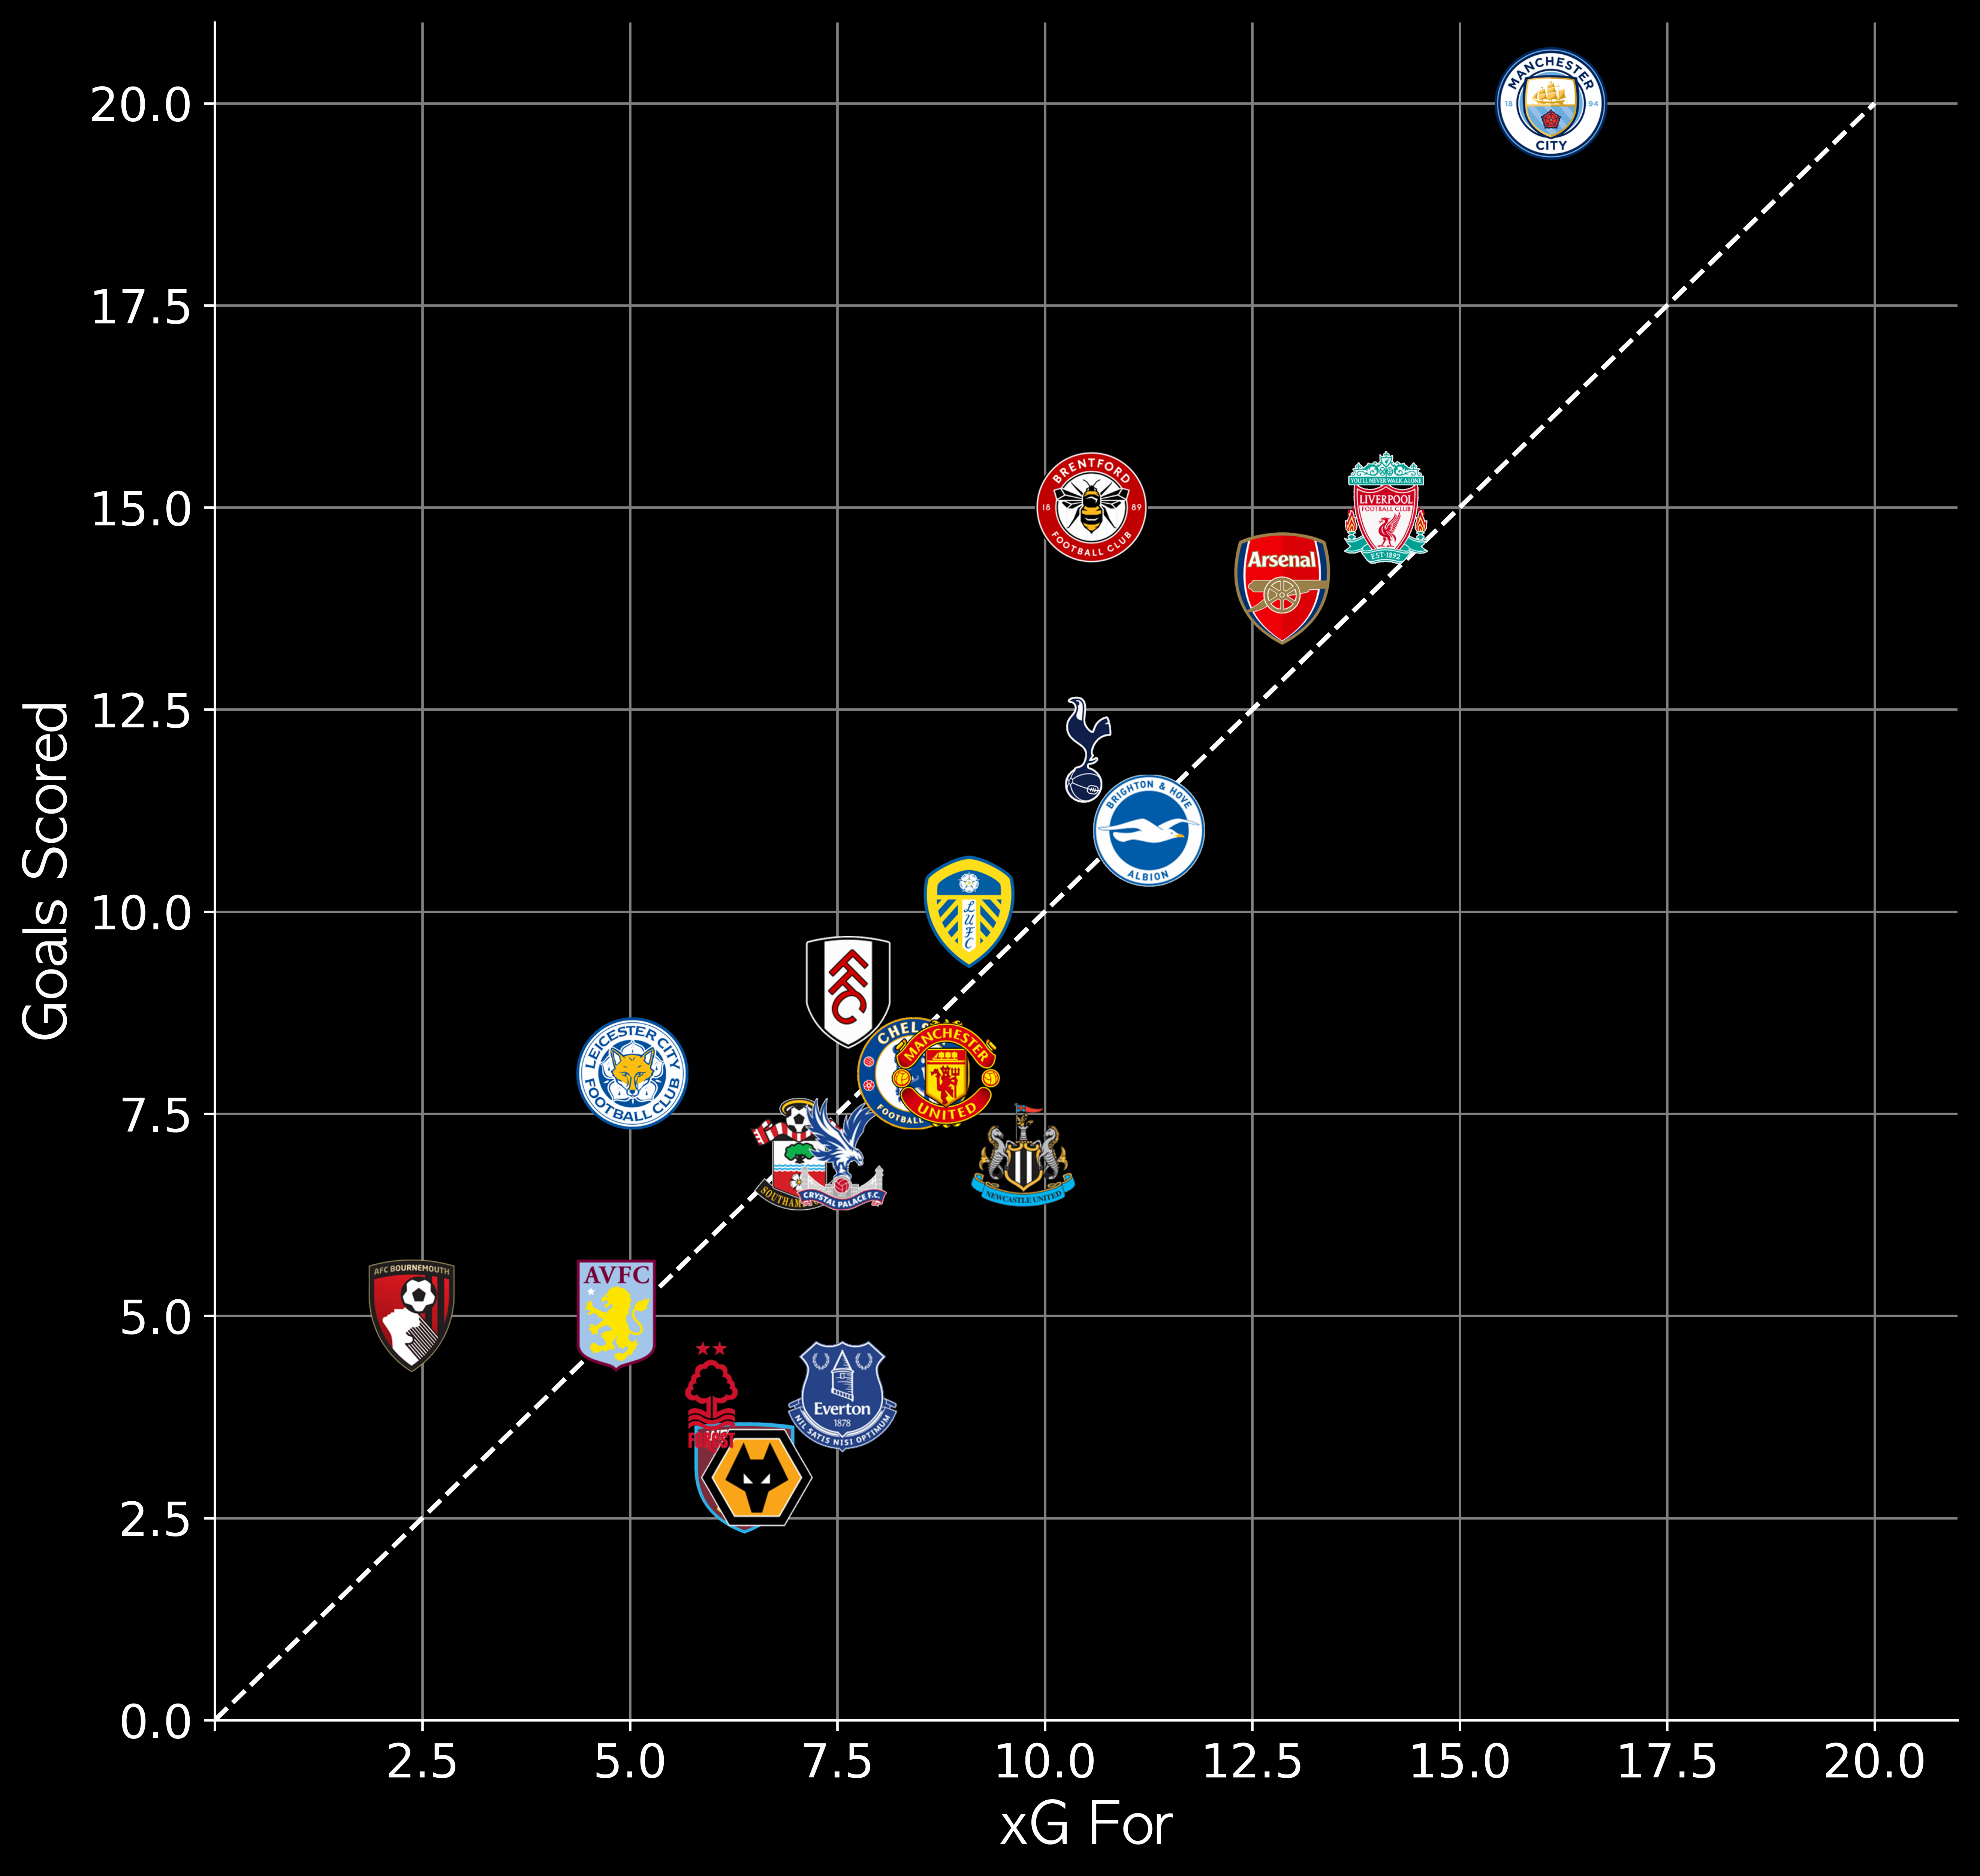

In [26]:
fig = plt.figure(figsize=(10,10), dpi=600)
ax = plt.subplot()

ax.set_ylim(0,21)
ax.set_xlim(0,21)


fig.set_facecolor('black')
ax.patch.set_facecolor('black')


ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')


xticks = ax.xaxis.get_major_ticks() 
xticks[0].label1.set_visible(False)


# Add spines
ax.spines["top"].set(visible = False)   #spines removes the plot edges(border)
ax.spines["right"].set(visible = False)
ax.spines['bottom'].set_color('white')
ax.spines['left'].set_color('white')

# -- Transformation functions
DC_to_FC = ax.transData.transform
FC_to_NFC = fig.transFigure.inverted().transform
# -- Take data coordinates and transform them to normalized figure coordinates
DC_to_NFC = lambda x: FC_to_NFC(DC_to_FC(x))

ax_size = 0.05
plt.grid(color='gray')

plt.xlabel("xG For",font ='AppleGothic',fontsize = 18,color="white")
plt.ylabel("Goals Scored",font ='AppleGothic',fontsize = 18,color= "white")
ax.tick_params(labelsize=15)

xpoints = np.array([0,20])
ypoints = np.array([0,20])

plt.plot(xpoints, ypoints, color = 'white',linestyle = '--')


counter = 0
for x,y in zip(df["xG"], df["G"]):
    ax_coords = DC_to_NFC((x,y))
    image_ax = fig.add_axes(
        [ax_coords[0] - ax_size/2, ax_coords[1] - ax_size/2, ax_size, ax_size],
         fc='None'
    )
    ax_logo(clubs[counter], image_ax)
    counter += 1
    
fig.savefig("AFC VS ARS.jpg")

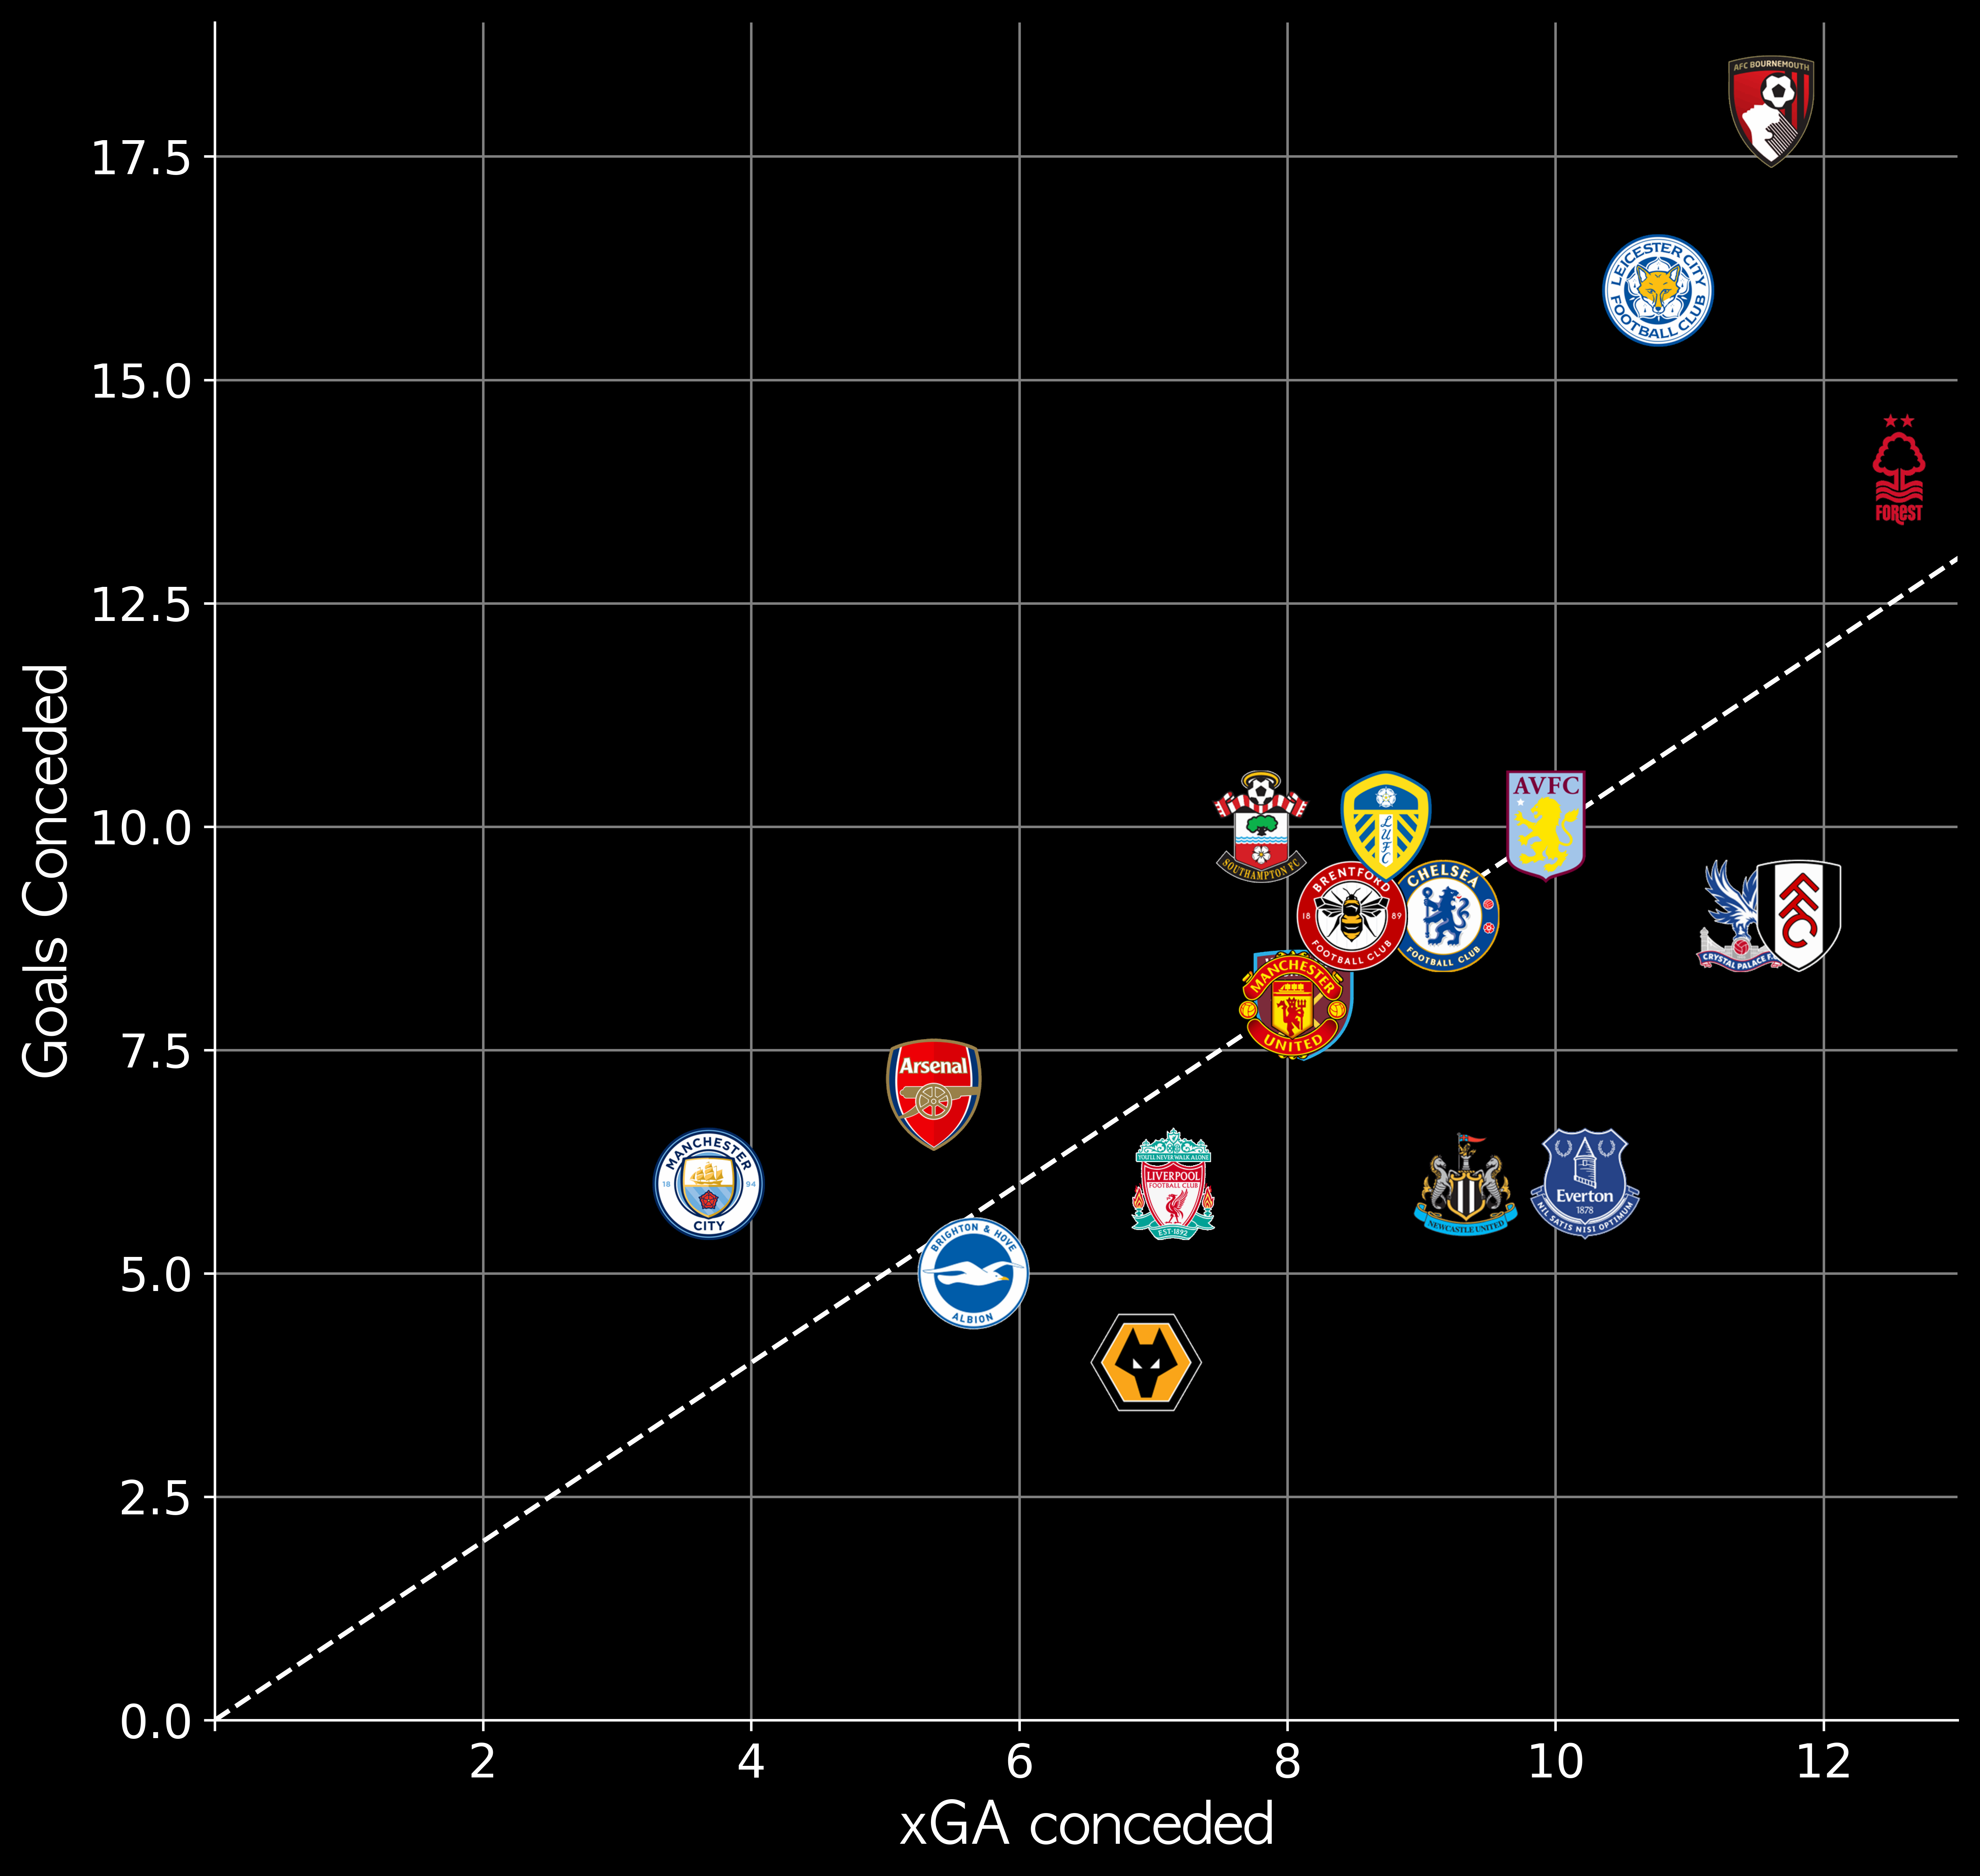

In [29]:
fig = plt.figure(figsize=(10,10), dpi=600)
ax = plt.subplot()

ax.set_ylim(0,19)
ax.set_xlim(0,13)


fig.set_facecolor('black')
ax.patch.set_facecolor('black')


ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')


xticks = ax.xaxis.get_major_ticks() 
xticks[0].label1.set_visible(False)


# Add spines
ax.spines["top"].set(visible = False)   #spines removes the plot edges(border)
ax.spines["right"].set(visible = False)
ax.spines['bottom'].set_color('white')
ax.spines['left'].set_color('white')

# -- Transformation functions
DC_to_FC = ax.transData.transform
FC_to_NFC = fig.transFigure.inverted().transform
# -- Take data coordinates and transform them to normalized figure coordinates
DC_to_NFC = lambda x: FC_to_NFC(DC_to_FC(x))

ax_size = 0.05
plt.grid(color='gray')

plt.xlabel("xGA conceded",font ='AppleGothic',fontsize = 18,color="white")
plt.ylabel("Goals Conceded",font ='AppleGothic',fontsize = 18,color= "white")
ax.tick_params(labelsize=15)

xpoints = np.array([0,20])
ypoints = np.array([0,20])

plt.plot(xpoints, ypoints, color = 'white',linestyle = '--')


counter = 0
for x,y in zip(df["xGA"], df["GA"]):
    ax_coords = DC_to_NFC((x,y))
    image_ax = fig.add_axes(
        [ax_coords[0] - ax_size/2, ax_coords[1] - ax_size/2, ax_size, ax_size],
         fc='None'
    )
    ax_logo(clubs[counter], image_ax)
    counter += 1
    
fig.savefig("AFC VS ARS.jpg")